<a href="https://colab.research.google.com/github/ajurberg/BankLets-microservices/blob/master/regress%C3%A3o_linear_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

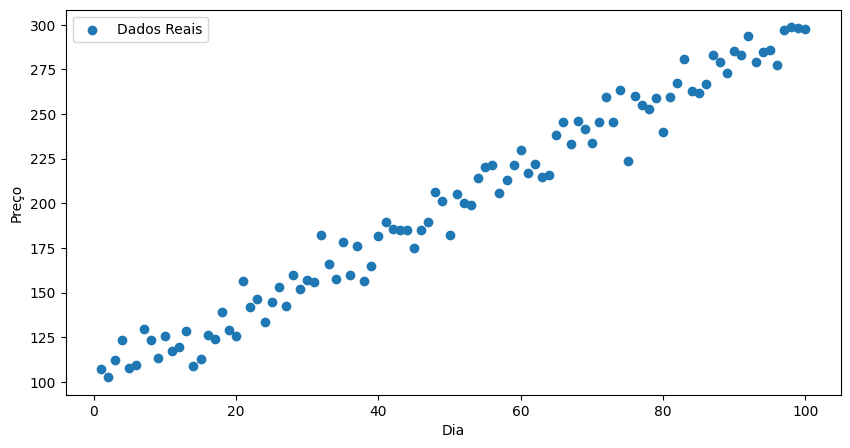

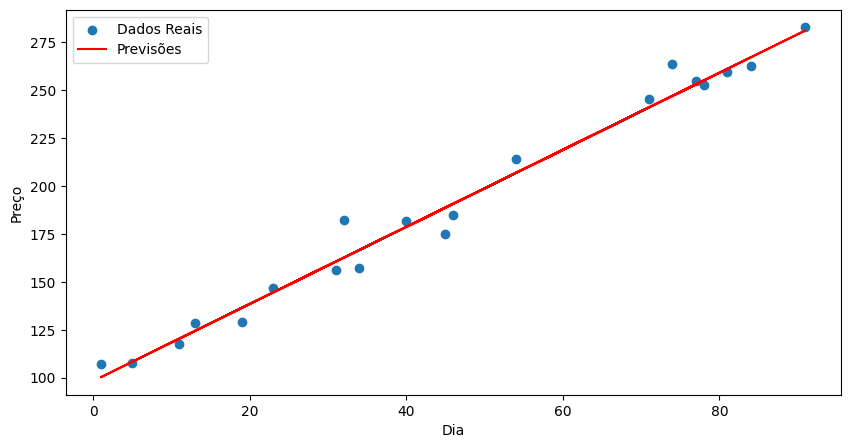

Erro Quadrático Médio: 62.20422422901794


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios para ilustração
np.random.seed(42)
dias = np.arange(1, 101, 1)
precos = 100 + 2 * dias + np.random.normal(0, 10, size=len(dias))

# Criando um DataFrame do pandas
dados = pd.DataFrame({'Dia': dias, 'Preço': precos})

# Visualizando os dados
plt.figure(figsize=(10, 5))
plt.scatter(dados['Dia'], dados['Preço'], label='Dados Reais')
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.legend()
plt.show()

# Dividindo os dados em conjuntos de treinamento e teste
X = dados[['Dia']]
y = dados['Preço']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Fazendo previsões
previsoes = modelo.predict(X_teste)

# Visualizando as previsões
plt.figure(figsize=(10, 5))
plt.scatter(X_teste, y_teste, label='Dados Reais')
plt.plot(X_teste, previsoes, color='red', label='Previsões')
plt.xlabel('Dia')
plt.ylabel('Preço')
plt.legend()
plt.show()

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_teste, previsoes)
print(f'Erro Quadrático Médio: {mse}')

O Erro Quadrático Médio (EQM ou MSE, do inglês Mean Squared Error) é uma métrica comumente utilizada para avaliar o desempenho de modelos de regressão, como o modelo de regressão linear no exemplo fornecido. Ele mede a média dos quadrados dos erros entre os valores preditos pelo modelo e os valores reais.

A fórmula matemática para o MSE é:

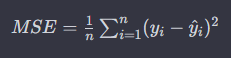

onde:

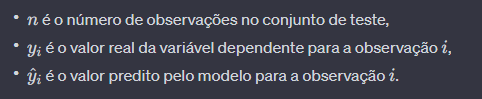


A interpretação do MSE é em termos dos quadrados dos valores. Quanto menor o MSE, melhor é o desempenho do modelo, pois isso significa que os valores preditos estão mais próximos dos valores reais. No entanto, é essencial considerar a escala dos dados ao interpretar o MSE, já que ele é o quadrado da unidade de medida da variável dependente.

Por exemplo, se estivermos prevendo preços de ações em dólares, o MSE será em termos de dólares ao quadrado. Para tornar a interpretação mais intuitiva, muitas vezes é usado o Raiz Quadrada do Erro Quadrático Médio (RMSE), que é a raiz quadrada do MSE:



O RMSE possui a mesma unidade de medida que a variável dependente original e fornece uma interpretação mais fácil em termos do erro médio.

Em resumo, ao avaliar um modelo de regressão, você deseja minimizar o MSE ou RMSE para garantir que o modelo esteja fazendo previsões precisas em relação aos dados reais.

In [2]:
%%capture
! pip install yfinance

[*********************100%%**********************]  1 of 1 completed


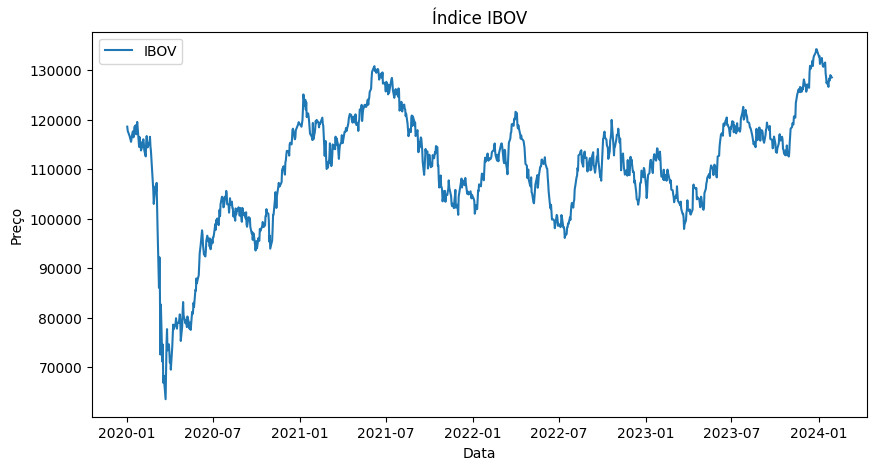

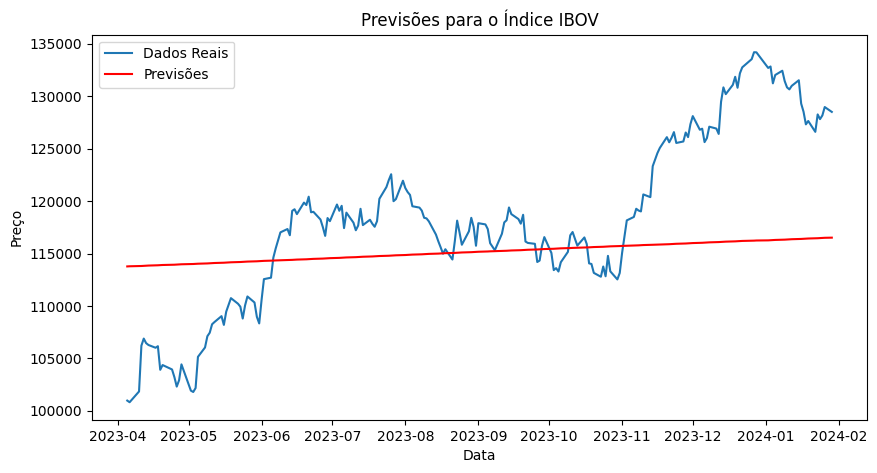

Erro Quadrático Médio: 61203633.75244935


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Baixando dados do IBOV do Yahoo Finance
ibov = yf.download('^BVSP', start='2020-01-01', end='2024-01-30')

# Visualizando os dados
plt.figure(figsize=(10, 5))
plt.plot(ibov['Close'], label='IBOV')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Índice IBOV')
plt.legend()
plt.show()

# Dividindo os dados em conjuntos de treinamento e teste
ibov['Dia'] = range(1, len(ibov) + 1)
X = ibov[['Dia']]
y = ibov['Close']
X_treino, X_teste, y_treino, y_teste = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# Criando um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Fazendo previsões
previsoes = modelo.predict(X_teste)

# Visualizando as previsões
plt.figure(figsize=(10, 5))
plt.plot(ibov.index[int(0.8*len(ibov)):], y_teste, label='Dados Reais')
plt.plot(ibov.index[int(0.8*len(ibov)):], previsoes, color='red', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Previsões para o Índice IBOV')
plt.legend()
plt.show()

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_teste, previsoes)
print(f'Erro Quadrático Médio: {mse}')

In [13]:
%%capture
! pip install tensorflow

[*********************100%%**********************]  1 of 1 completed


Epoch 1/50
26/26 [==============================] - 4s 10ms/step - loss: 0.1063
Epoch 2/50
26/26 [==============================] - 0s 10ms/step - loss: 0.0080
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 4/50
26/26 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 5/50
26/26 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 6/50
26/26 [==============================] - 0s 12ms/step - loss: 0.0020
Epoch 7/50
26/26 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 8/50
26/26 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 9/50
26/26 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 10/50
26/26 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 11/50
26/26 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 12/50
26/26 [==============================] - 0s 11ms/step - loss: 0.0017
Epoch 13/50
26/26 [====================

ValueError: x and y must have same first dimension, but have shapes (193,) and (201, 1)

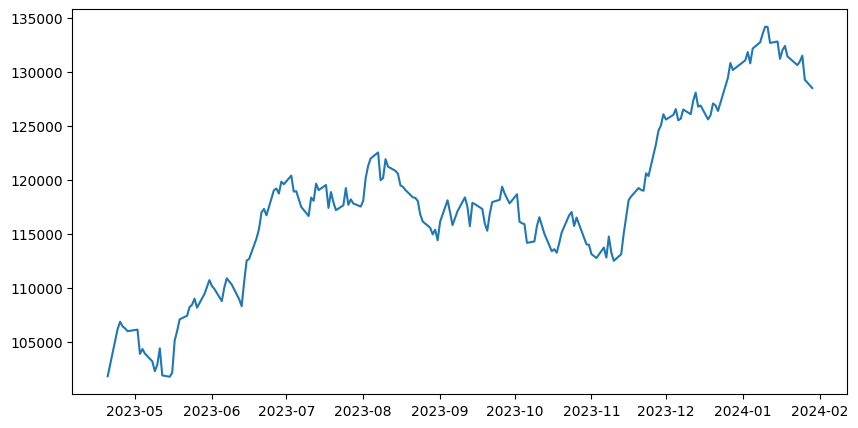

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Baixando dados do IBOV do Yahoo Finance
ibov = yf.download('^BVSP', start='2020-01-01', end='2024-01-30')

# Usando apenas os preços de fechamento
dados = ibov['Close'].values.reshape(-1, 1)

# Normalizando os dados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

# Função para criar sequências temporais
def criar_sequencias_temporais(dados, passos):
    X, y = [], []
    for i in range(len(dados) - passos):
        sequencia = dados[i:(i + passos), 0]
        X.append(sequencia)
        y.append(dados[i + passos, 0])
    return np.array(X), np.array(y)

# Definindo o número de passos no tempo
passos_temporais = 10

# Criando sequências temporais
X, y = criar_sequencias_temporais(dados_normalizados, passos_temporais)

# Dividindo os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = X[:int(0.8*len(X))], X[int(0.8*len(X)):], y[:int(0.8*len(y))], y[int(0.8*len(y)):]

# Criando o modelo da rede neural
modelo = Sequential()
modelo.add(LSTM(50, activation='relu', input_shape=(passos_temporais, 1)))
modelo.add(Dense(1))
modelo.compile(optimizer='adam', loss='mse')

# Treinando o modelo
modelo.fit(X_treino.reshape((X_treino.shape[0], X_treino.shape[1], 1)), y_treino, epochs=50, batch_size=32)

# Fazendo previsões
previsoes = modelo.predict(X_teste.reshape((X_teste.shape[0], X_teste.shape[1], 1)))
previsoes = scaler.inverse_transform(previsoes)
y_teste = scaler.inverse_transform(y_teste.reshape(-1, 1))

# Visualizando as previsões
plt.figure(figsize=(10, 5))
indices = ibov.index[int(0.8*len(ibov)) + passos_temporais:int(0.8*len(ibov)) + passos_temporais+len(previsoes)]
plt.plot(indices, y_teste[:len(indices)], label='Dados Reais')
plt.plot(indices, previsoes, color='red', label='Previsões')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Previsões para o Índice IBOV com Rede Neural')
plt.legend()
plt.show()

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_teste, previsoes)
print(f'Erro Quadrático Médio: {mse}')